# Train the model using library

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# import the dataset

dataset = pd.read_csv('../Data/Housing.csv')

# EDA

In [81]:
dataset.head()
dataset.info()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Visualization

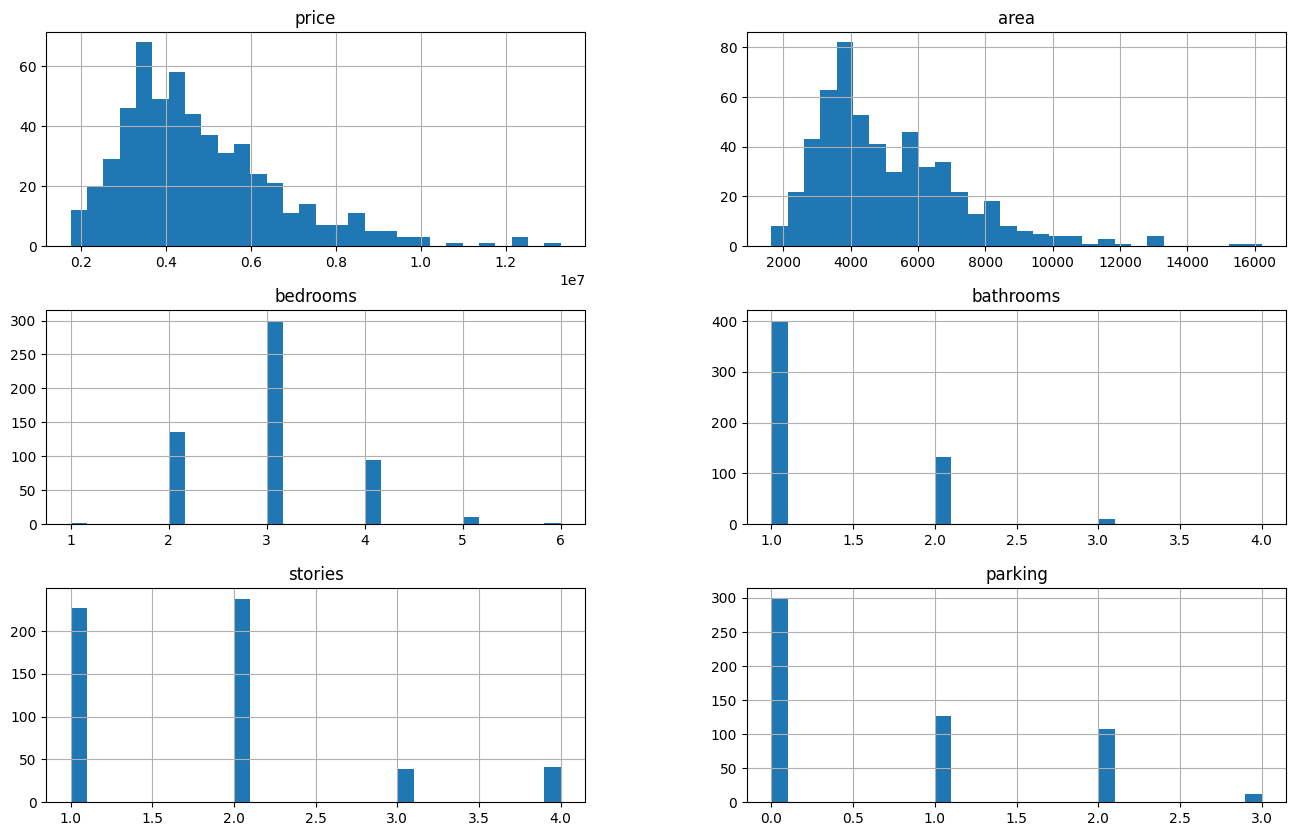

In [82]:
dataset.hist(figsize=(16, 10), bins=30)
plt.show()

# ✅ Boxplot (Outlier চেক করতে)

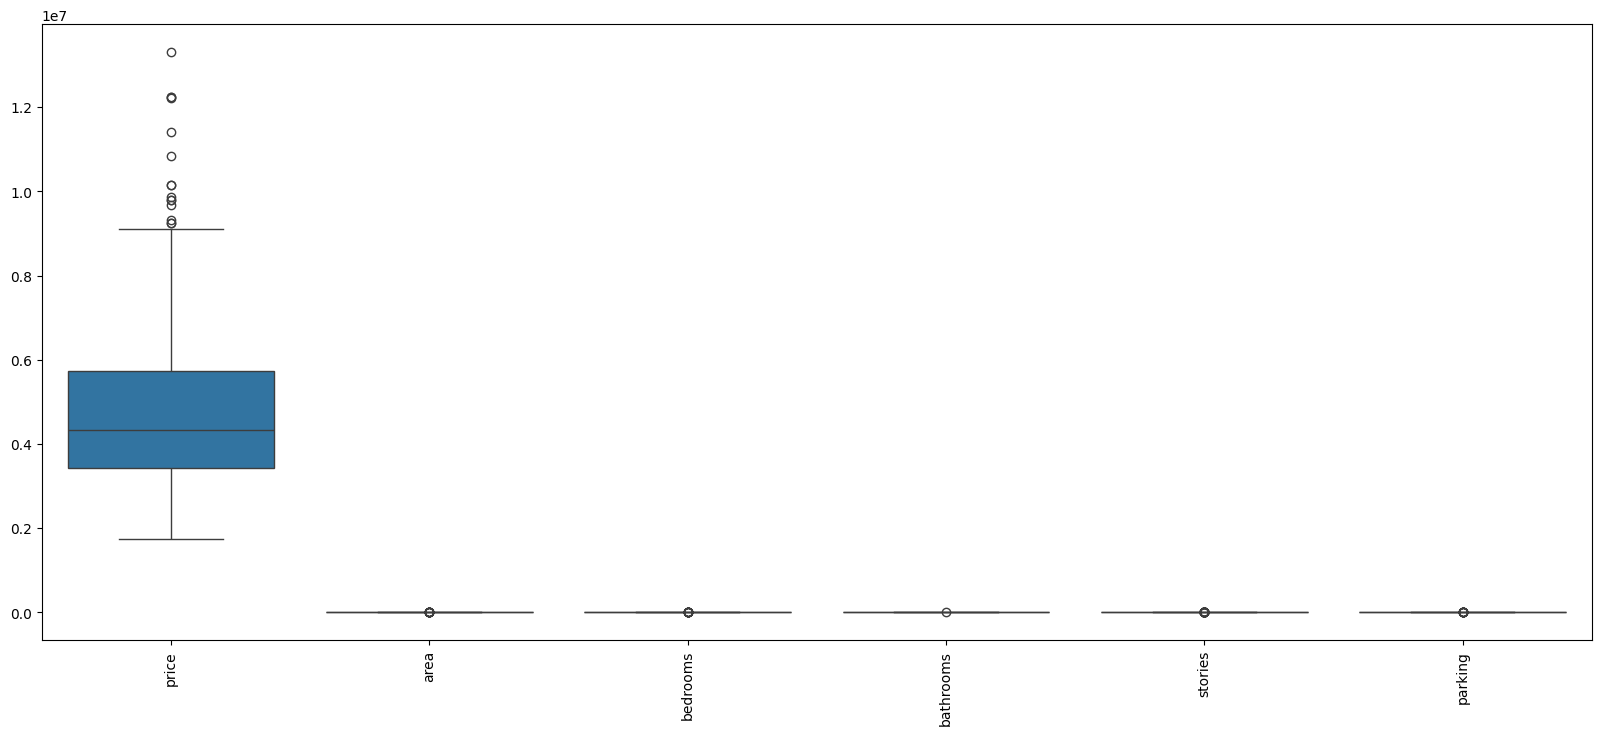

In [83]:

plt.figure(figsize=(20, 8))
sns.boxplot(dataset)
plt.xticks(rotation=90)
plt.show()

# ✅ Pairplot (Feature-Feature সম্পর্ক বুঝতে)

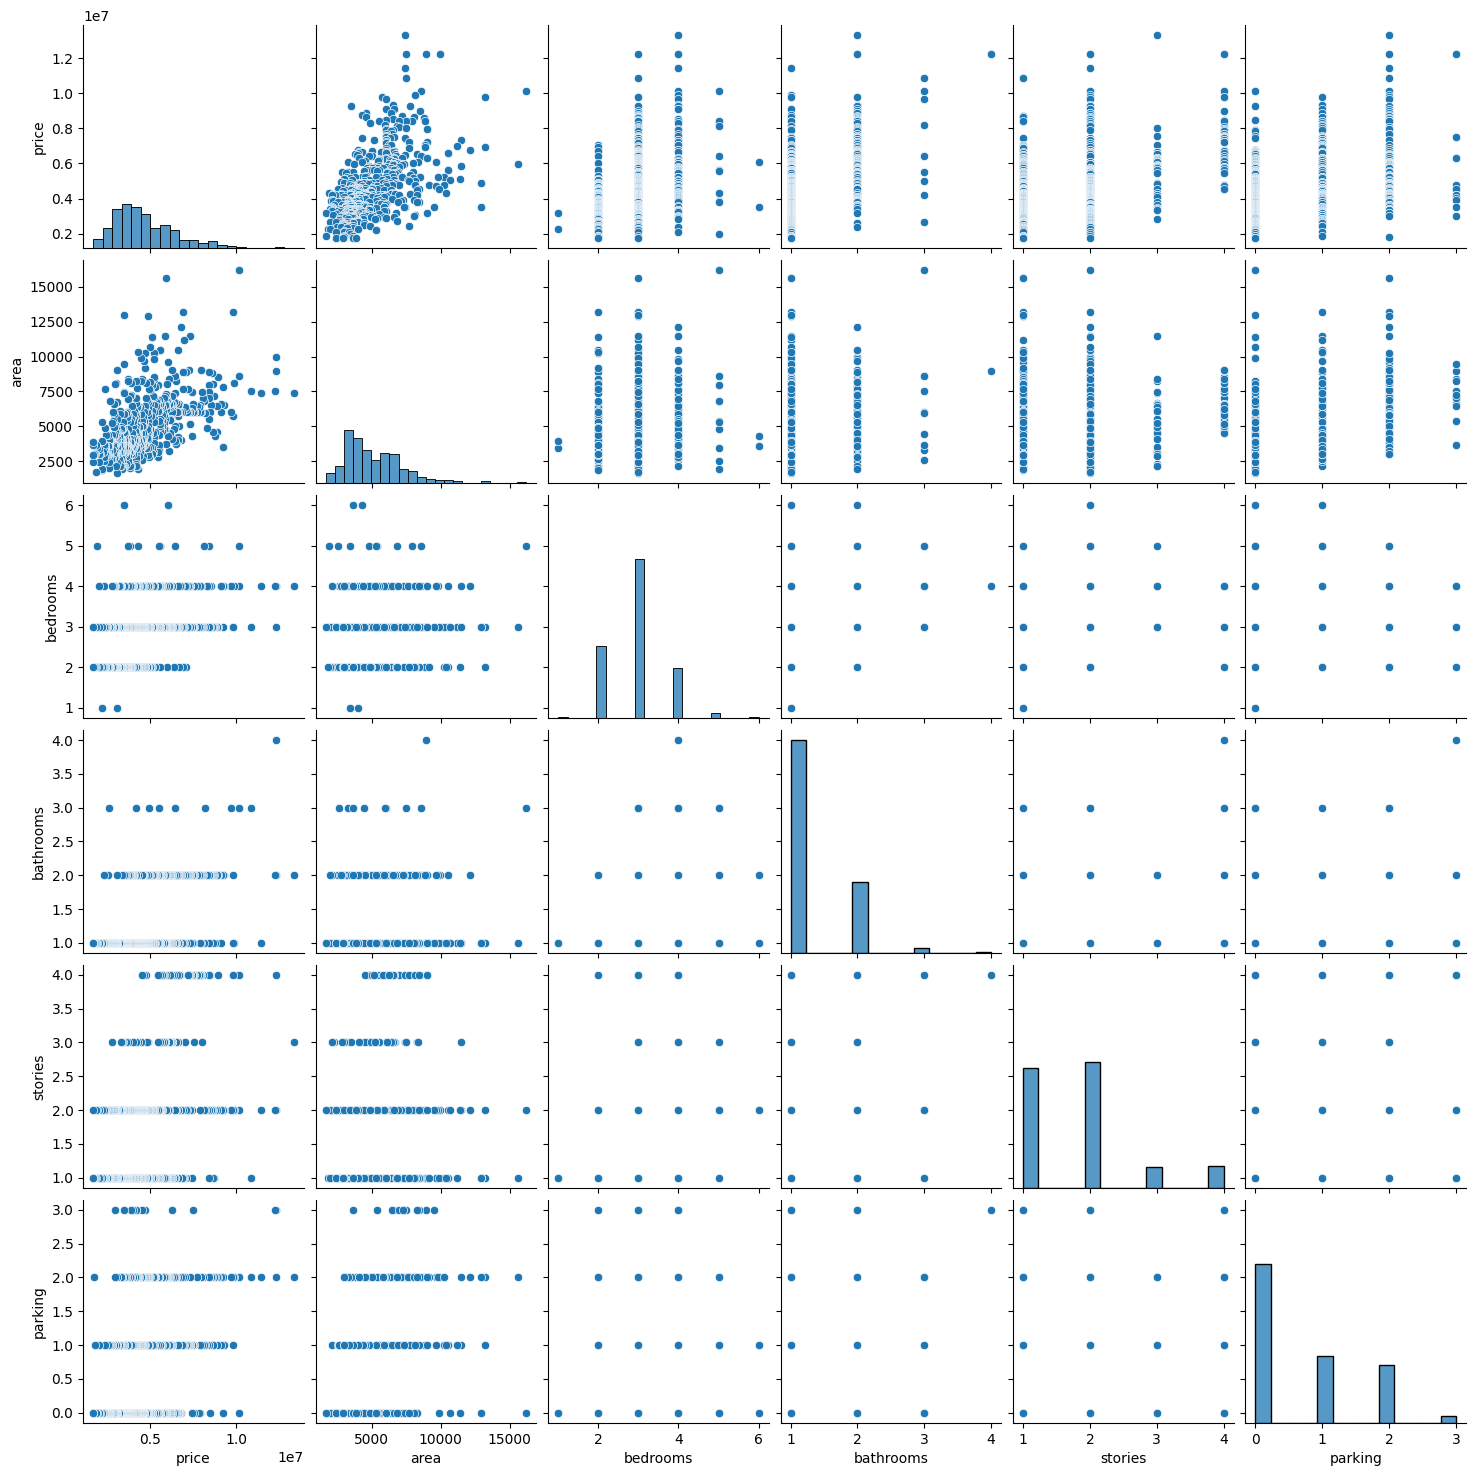

In [84]:
sns.pairplot(data=dataset)
plt.show()

# Bar plot for categorical columns

In [85]:
cat_col = [col for col in dataset.columns if dataset[col].dtype == 'object']
cat_col

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

✅ Bar Plot (বিভিন্ন ক্যাটাগরির ফ্রিকোয়েন্সি চেক করতে)

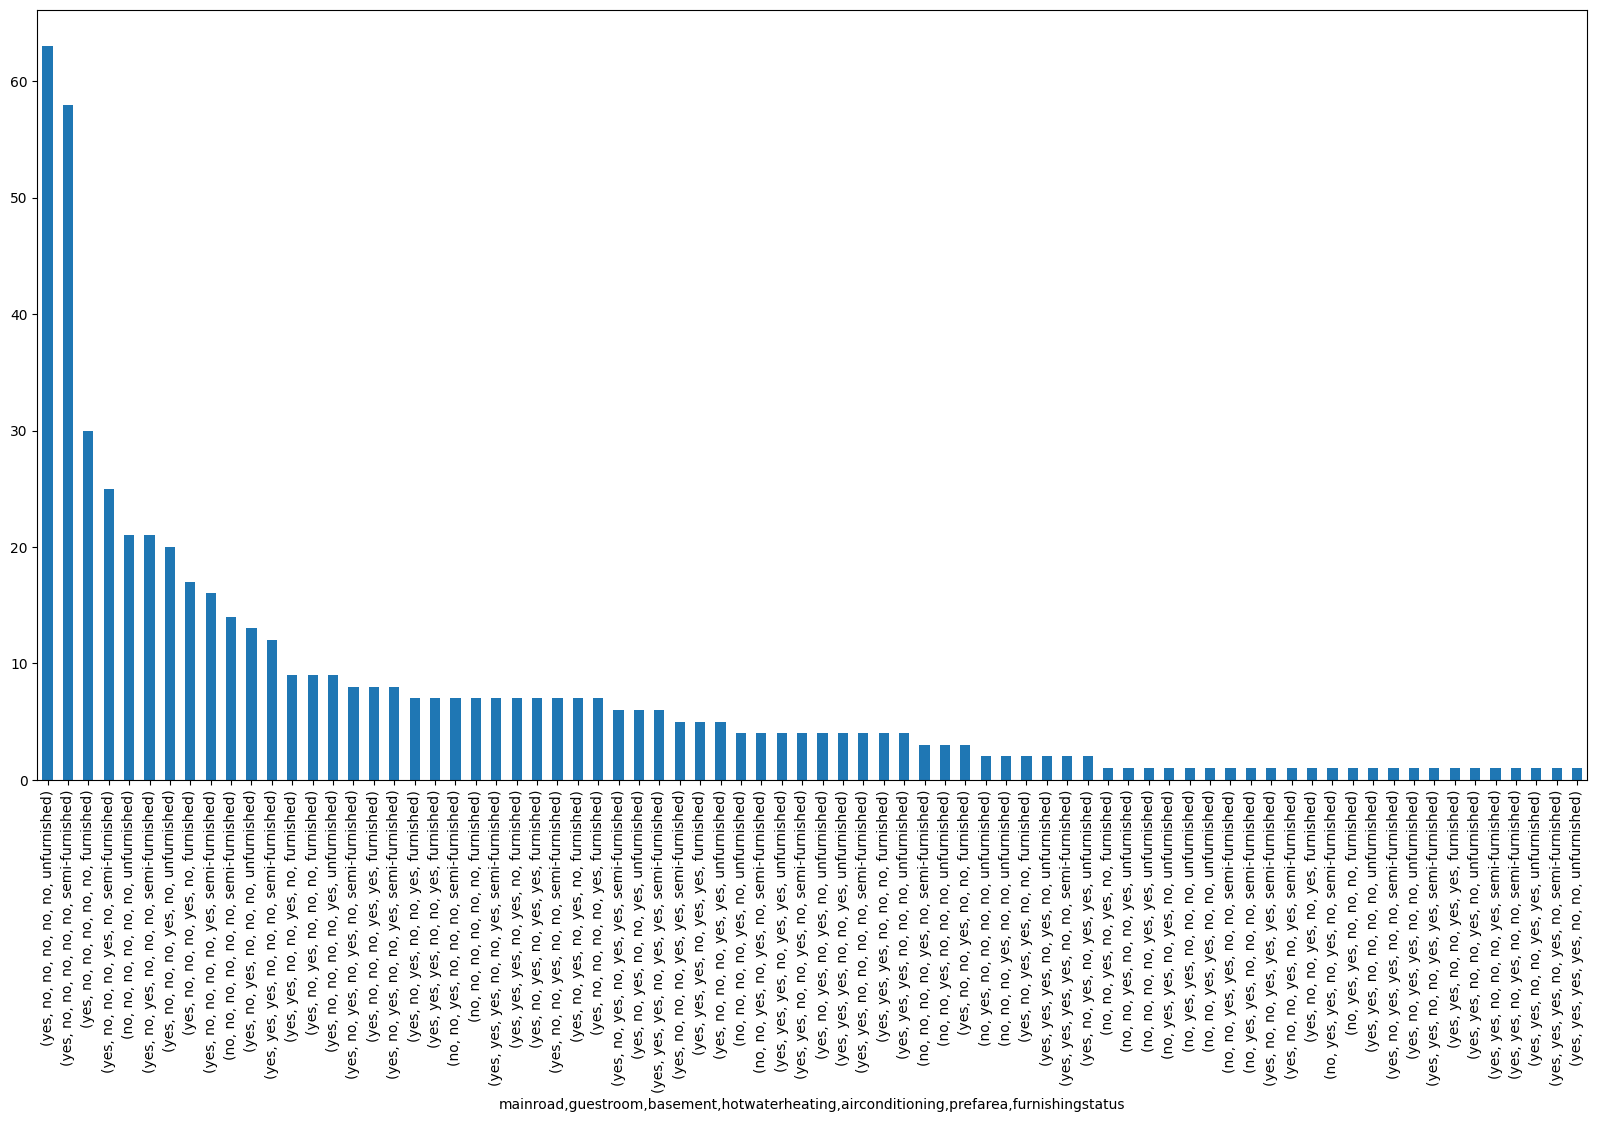

In [86]:
dataset[cat_col].value_counts().plot(kind='bar', figsize=(20, 10))
plt.show()

# ✅ Scatter Plot (X vs Y সম্পর্ক বুঝতে - Regression Analysis)

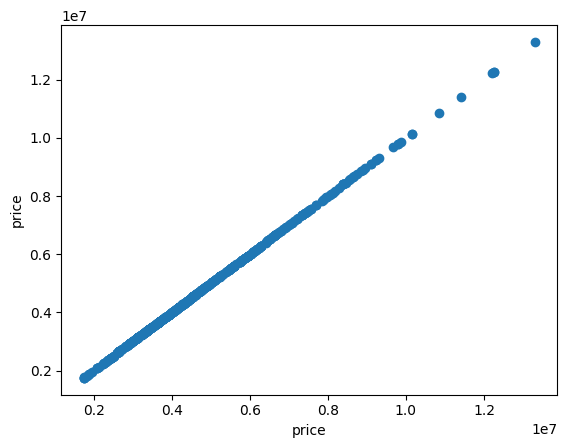

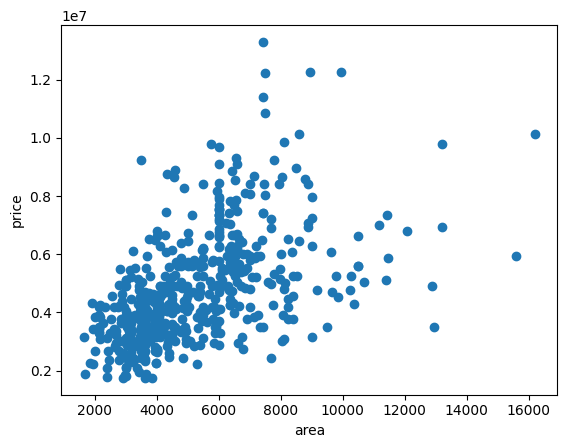

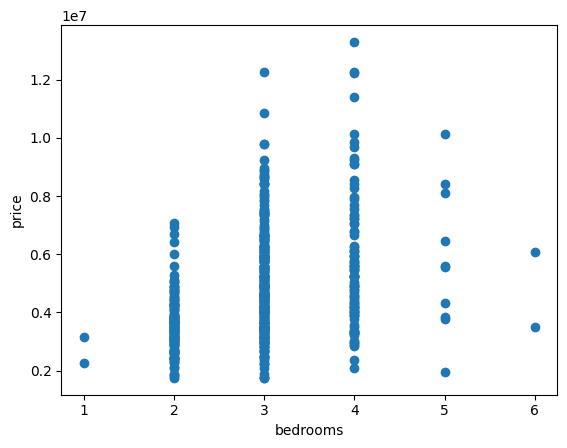

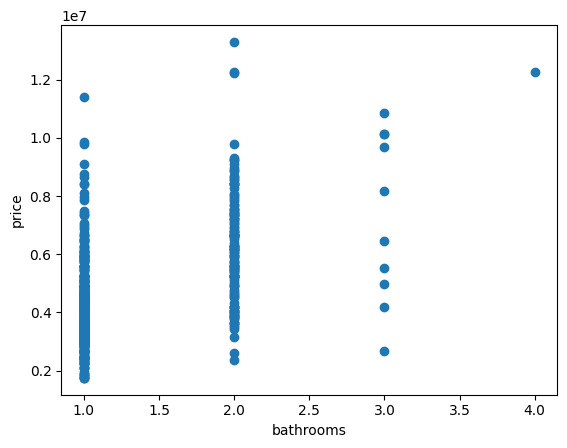

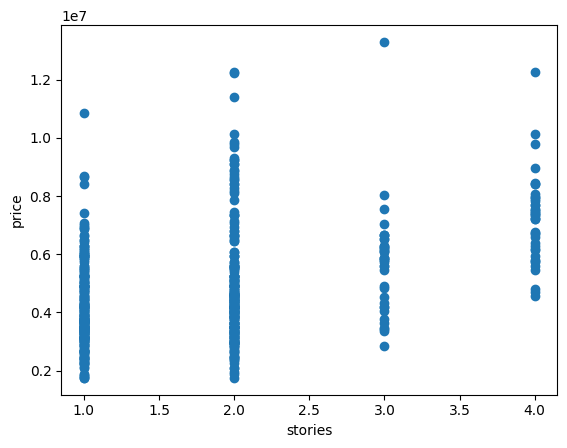

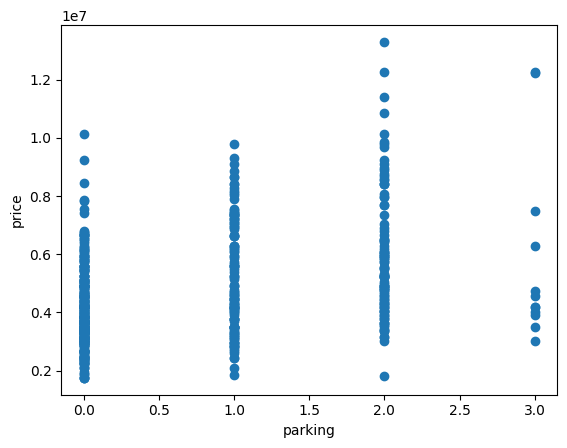

<Figure size 640x480 with 0 Axes>

In [87]:
numerical_features = [col for col in dataset.columns if dataset[col].dtype != 'object']
numerical_features


for feature in range(len(numerical_features)):
    plt.scatter(x=dataset[numerical_features[feature]], y=dataset['price'])
    plt.xlabel(numerical_features[feature])
    plt.ylabel("price")
    plt.show()
    
plt.tight_layout()

In [88]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<Axes: >

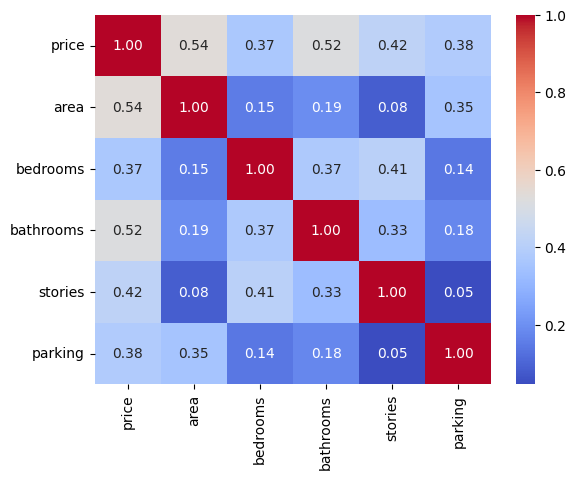

In [89]:
dataset.describe()
dataset[numerical_features].corr()
sns.heatmap(dataset[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Features Engineering

Step 1: Detect & Remove Outliers using IQR

⚡ সংক্ষেপে বললে:

✔ IQR বের করা হয় Q3 - Q1 দিয়ে।

✔ Lower Bound = Q1 - (1.5 × IQR)

✔ Upper Bound = Q3 + (1.5 × IQR)

✔ ১.৫ একটি স্ট্যান্ডার্ড মান যা সাধারণ outlier গুলো ফিল্টার করতে সাহায্য করে।

<Axes: ylabel='price'>

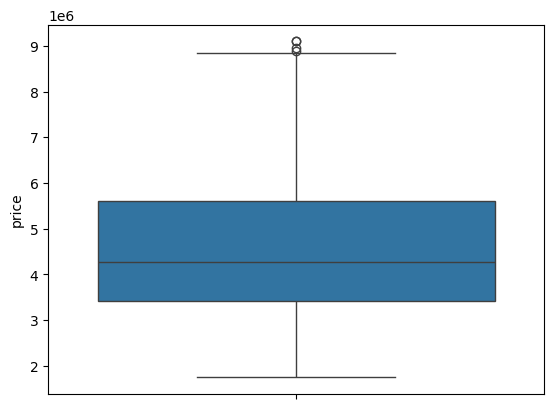

In [90]:
Q1=dataset['price'].quantile(0.25)
Q3=dataset['price'].quantile(0.75)

IQR = Q3 - Q1
IQR

lower_bound = Q1 - 1.5 * IQR   # 👉 1.5 × IQR Tukey's Fences Method
upper_bound = Q3 + 1.5 * IQR

dataset= dataset[(dataset['price'] >= lower_bound) & (dataset['price'] <= upper_bound)]
sns.boxplot(dataset['price'])

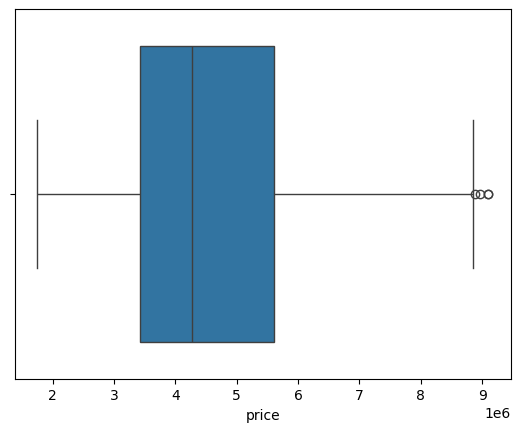

In [91]:
sns.boxplot(x=dataset['price'])
plt.show()

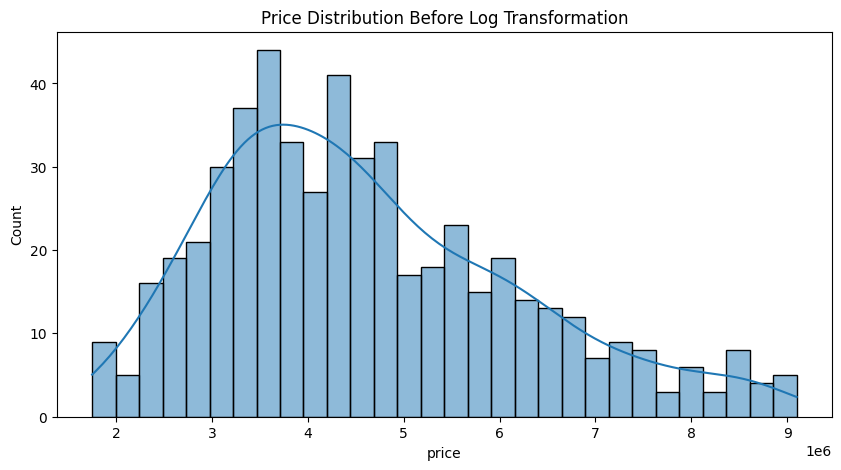

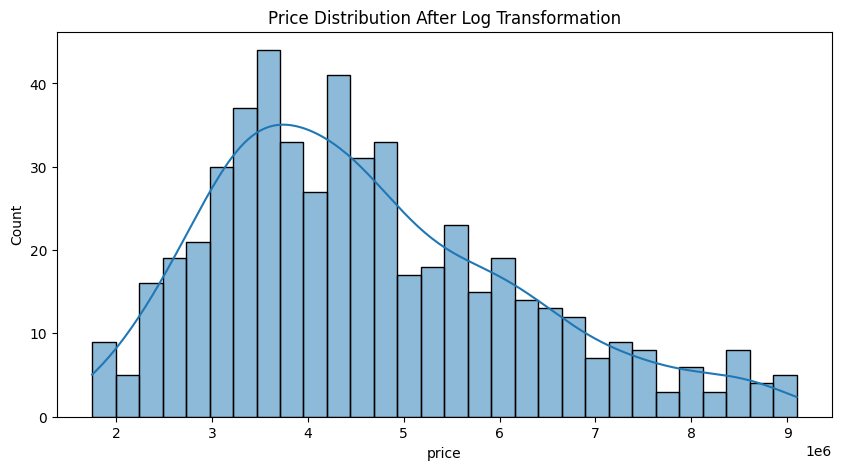

In [92]:
# Check the distribution before transformation
plt.figure(figsize=(10, 5))
sns.histplot(dataset['price'], bins=30, kde=True)
plt.title("Price Distribution Before Log Transformation")
plt.show()

# Apply log transformation
# dataset['price'] = np.log(dataset['price'])

# Check the distribution after transformation
plt.figure(figsize=(10, 5))
sns.histplot(dataset['price'], bins=30, kde=True)
plt.title("Price Distribution After Log Transformation")
plt.show()


In [93]:
# dataset['mainroad'] = dataset['mainroad'].astype('int')
# dataset['maguestroominroad'] = np.where(dataset['guestroom'] == 'yes', 1, 0).astype('int')
# dataset['basement'] = np.where(dataset['basement'] == 'yes', 1, 0).astype('int')
# dataset['hotwaterheating'] = np.where(dataset['hotwaterheating'] == 'yes', 1, 0).astype('int')
# dataset['airconditioning'] = np.where(dataset['airconditioning'] == 'yes', 1, 0).astype('int')
# dataset['prefarea'] = np.where(dataset['prefarea'] == 'yes', 1, 0).astype('int')
# dataset['furnishingstatus'] = np.where(dataset['furnishingstatus'] == 'yes', 1, 0).astype('int')
# dataset['prefarea'].unique()

In [94]:
for col in cat_col:
    print(col)
    dataset[col] = np.where(dataset[col] == 'yes', 1, 0).astype('int')
    

mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea
furnishingstatus


In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             530 non-null    int64
 1   area              530 non-null    int64
 2   bedrooms          530 non-null    int64
 3   bathrooms         530 non-null    int64
 4   stories           530 non-null    int64
 5   mainroad          530 non-null    int64
 6   guestroom         530 non-null    int64
 7   basement          530 non-null    int64
 8   hotwaterheating   530 non-null    int64
 9   airconditioning   530 non-null    int64
 10  parking           530 non-null    int64
 11  prefarea          530 non-null    int64
 12  furnishingstatus  530 non-null    int64
dtypes: int64(13)
memory usage: 58.0 KB


# independent and dependent columns
- standardization

C:\Users\USER\AppData\Local\Temp\ipykernel_2532\3471302876.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['price'], kde=True)


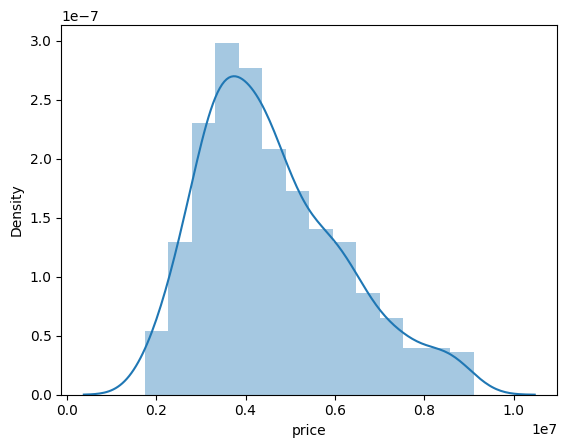

In [96]:
sns.distplot(dataset['price'], kde=True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2532\1311701850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(dataset['price']), kde=True)


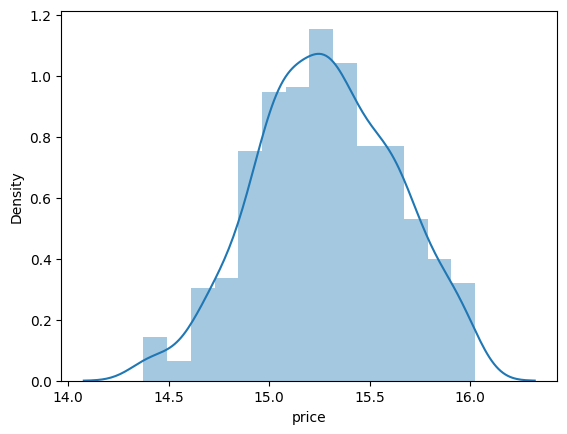

In [97]:
sns.distplot(np.log(dataset['price']), kde=True)
plt.show()

In [98]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0


In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [120]:
# dependent and independent columns
X = dataset.drop(columns=['price'])
y = dataset['price']

# Split into train & test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [129]:
# standardization
scaler = StandardScaler()
# y_scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
# y_test = y_scaler.transform(y_test.values.reshape(-1,1))

In [109]:
# now train this mode
regressor = LinearRegression(n_jobs=-1)
regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print(f"Accuracy for train data for LR: {r2_score(y_train, y_train_pred)}")
print(f"Accuracy for test data for LR: {r2_score(y_test, y_test_pred)}")

Accuracy for train data for LR: 0.6518233667110087
Accuracy for test data for LR: 0.648871256884819


In [130]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42
)
xgb_regressor.fit(X_train, y_train)
# Predictions
y_train_pred = xgb_regressor.predict(X_train)
y_test_pred = xgb_regressor.predict(X_test)

# Evaluate Performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train RMSE: 0.4873
Test RMSE: 0.7358


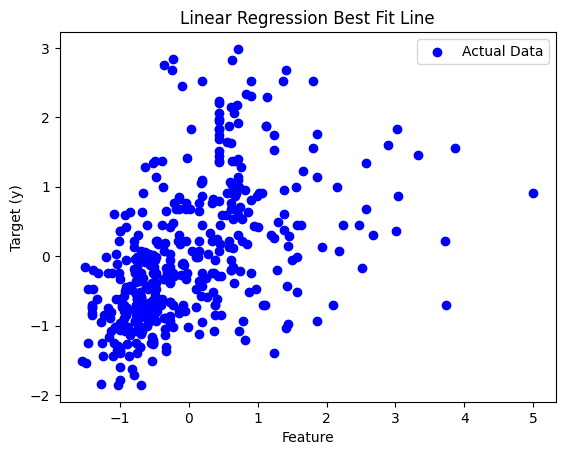

In [107]:
dataset.head()

plt.scatter(X_train[:, 0], y_train, color='blue', label="Actual Data")
# plt.plot(X_sorted, y_sorted, color='red', linewidth=2, label="Best Fit Line")

plt.xlabel("Feature")
plt.ylabel("Target (y)")
plt.title("Linear Regression Best Fit Line")
plt.legend()
plt.show()